# Compare turbine power and quantites

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.lines import Line2D

In [2]:
def timeaverage(t, dat, t1, t2):
    Ndim   = len(np.shape(dat))
    tfiltered   = t[(t>=t1)&(t<=t2)]
    if Ndim==1:
        datfiltered = dat[(t>=t1)&(t<=t2)]
    else:
        datfiltered = dat[(t>=t1)&(t<=t2),:]
        Nvars  = len(dat[0,:])
    tstart = tfiltered[0]
    tend   = tfiltered[-1]
    avgdat = 0.0 if Ndim==1 else np.zeros(Nvars)
    for i in range(len(tfiltered)-1):
        dt     = tfiltered[i+1] - tfiltered[i]
        if Ndim==1:
            avgdat = avgdat + 0.5*dt*(datfiltered[i+1] + datfiltered[i])
        else:
            avgdat = avgdat + 0.5*dt*(datfiltered[i+1,:] + datfiltered[i,:])
    return avgdat/(tend-tstart)

In [3]:
# Put the list of all cases in here
cases = [
    # AMR-Wind data defs
    {'label':'AMR-Wind',
     'datadir':'../AMR.5kmX5km_turbine1/post_processing/data',
     'prefix':'AMRWIND',
     'fname_pwr':'{prefix}_turb_GenPwr.dat',
     'fname_rotspeed':'{prefix}_turb_RotSpeed.dat',
     'fname_rotthrust':'{prefix}_turb_RotThrust.dat',
     'fname_rottorq':'{prefix}_turb_RotTorq.dat',
     'fname_Wind1VelX':'{prefix}_turb_Wind1VelX.dat',
     't0':300, 't1':900,
     'linestyle':{'linestyle':'-', 'lw':2},
    },
    
    # Nalu data defs
    {'label':'NALUWIND',
     'datadir':'../NALU.5kmX5km_turbine1/postprocessing/data',
     'prefix':'NALUWIND',
     'fname_pwr':'{prefix}_turb_GenPwr.dat',
     'fname_rotspeed':'{prefix}_turb_RotSpeed.dat',
     'fname_rotthrust':'{prefix}_turb_RotThrust.dat',
     'fname_rottorq':'{prefix}_turb_RotTorq.dat',
     'fname_Wind1VelX':'{prefix}_turb_Wind1VelX.dat',
     't0':300, 't1':900,
     'linestyle':{'linestyle':'--', 'lw':2},
    },

    # WRF data defs
    {'label':'WRF',
     'datadir':'../WRFLES.5kmX5km_turbine1/post_processing/data',
     'prefix':'WRFLES',
     'fname_pwr':'{prefix}_turb_GenPwr.dat',
     't0':1200, 't1':1800,
     'linestyle':{'linestyle':'-.', 'lw':2, 'color':'g'},
    },
    
    # FLORIS data defs
    {'label':'FLORIS',
     'datadir':'../FLORIS_turbine1/data',
     'prefix':'FLORIS',
     'fname_pwr':'{prefix}_turb_GenPwr.dat',
     't0':300, 't1':900,
     'linestyle':{'linestyle':':', 'lw':2, 'color':'k'},
    },

]

AMR-Wind   726.028977
NALUWIND   683.624962
WRF        914.839903
FLORIS     707.910587


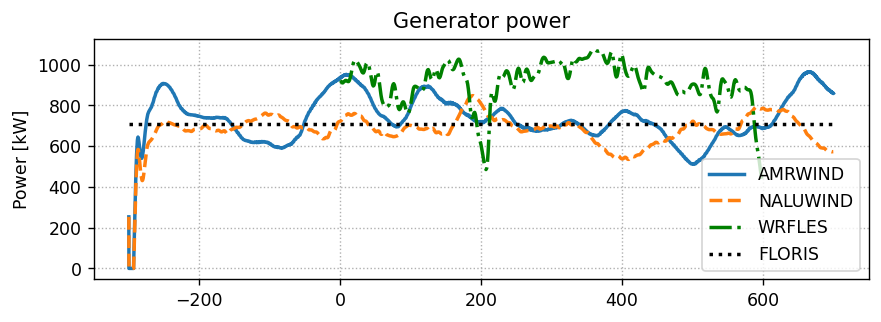

In [4]:
fig, ax = plt.subplots(1,1, figsize=(8,2.5), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    lstyle  = case['linestyle']
    t0      = case['t0']
    t1      = case['t1']
    if 'fname_pwr' in case:
        fname   = case['fname_pwr'] #f'{prefix}_HH_VEL_PROFILE_x_{xD:06.2f}D.dat'
        dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix), skiprows=2)
        ax.plot(dat[:,0]-t0, dat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
        power = timeaverage(dat[:,0], dat[:,1], t0, t1)
        print("%-10s %f"%(label, power))

ax.legend()
ax.set_ylabel('Power [kW]')
ax.set_title('Generator power')
ax.grid(ls=':')

AMR-Wind   7.162313
NALUWIND   7.026878


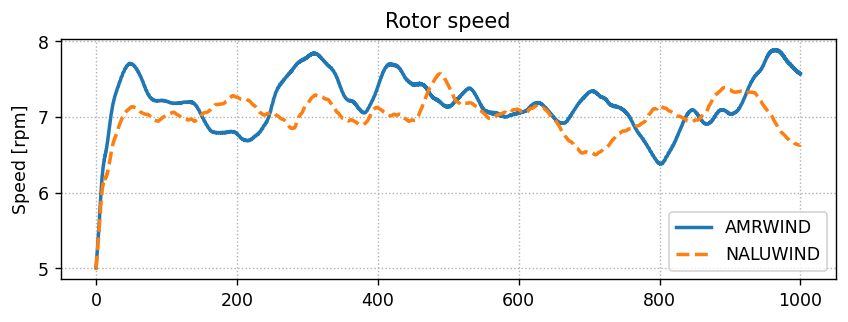

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,2.5), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    lstyle  = case['linestyle']
    t0      = case['t0']
    t1      = case['t1']    
    if 'fname_rotspeed' in case:
        fname   = case['fname_rotspeed']
        dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix), skiprows=2)
        ax.plot(dat[:,0], dat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
        power = timeaverage(dat[:,0], dat[:,1], t0, t1)
        print("%-10s %f"%(label, power))

ax.legend()
ax.set_ylabel('Speed [rpm]')
ax.set_title('Rotor speed')
ax.grid(ls=':')

AMR-Wind   263.515302
NALUWIND   237.450677


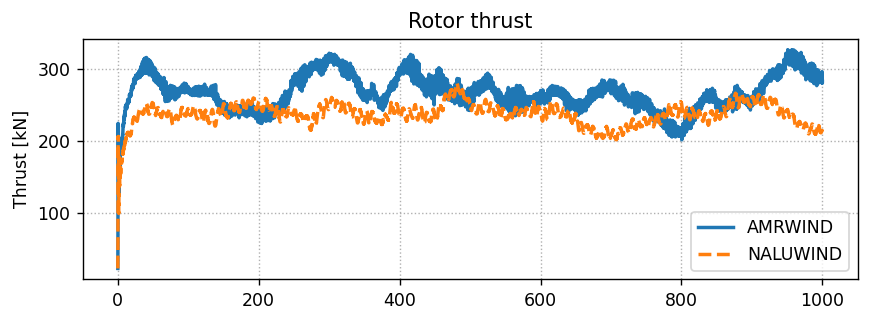

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,2.5), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    lstyle  = case['linestyle']
    t0      = case['t0']
    t1      = case['t1']
    if 'fname_rotthrust' in case:
        fname   = case['fname_rotthrust']
        dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix), skiprows=2)
        ax.plot(dat[:,0], dat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
        power = timeaverage(dat[:,0], dat[:,1], t0, t1)
        print("%-10s %f"%(label, power))

ax.legend()
ax.set_ylabel('Thrust [kN]')
ax.set_title('Rotor thrust')
ax.grid(ls=':')

AMR-Wind   1068.651863
NALUWIND   1034.991388


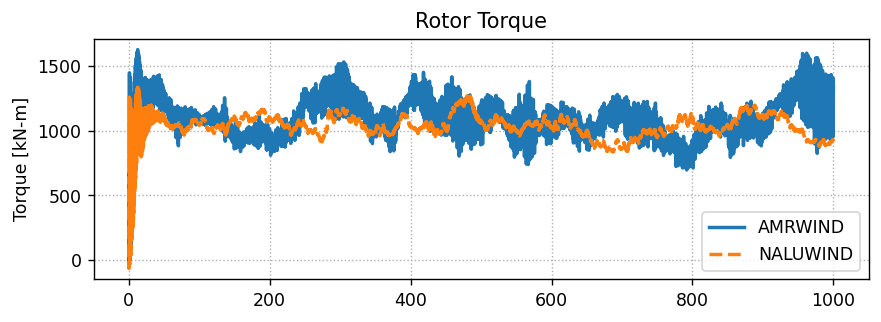

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,2.5), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    lstyle  = case['linestyle']
    t0      = case['t0']
    t1      = case['t1']
    if 'fname_rottorq' in case:
        fname   = case['fname_rottorq']
        dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix), skiprows=2)
        ax.plot(dat[:,0], dat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
        power = timeaverage(dat[:,0], dat[:,1], t0, t1)
        print("%-10s %f"%(label, power))

ax.legend()
ax.set_ylabel('Torque [kN-m]')
ax.set_title('Rotor Torque')
ax.grid(ls=':')

AMR-Wind   4.656878
NALUWIND   4.879312


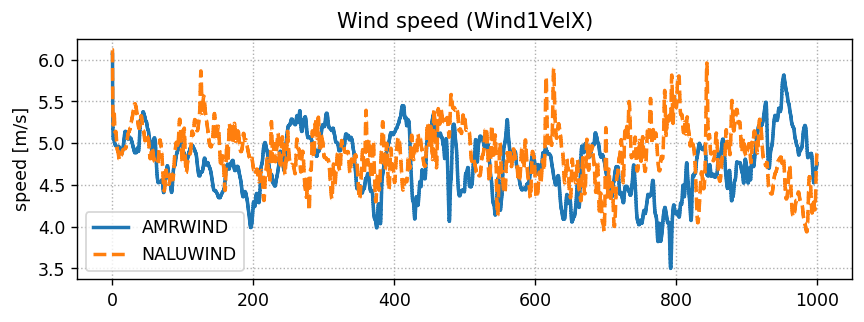

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,2.5), dpi=125)
for icase, case in enumerate(cases):
    label   = case['label']
    prefix  = case['prefix']
    datadir = case['datadir']
    lstyle  = case['linestyle']
    if 'fname_Wind1VelX' in case:
        fname   = case['fname_Wind1VelX']
        dat=np.loadtxt(datadir+'/'+fname.format(prefix=prefix), skiprows=2)
        ax.plot(dat[:,0], dat[:,1],  label=prefix, **lstyle) # color=cycle[ix],
        power = timeaverage(dat[:,0], dat[:,1], t0, t1)
        print("%-10s %f"%(label, power))

ax.legend()
ax.set_ylabel('speed [m/s]')
ax.set_title('Wind speed (Wind1VelX)')
ax.grid(ls=':')